# Jakarta - Seoul Sister City

Similarities and dissimilarities between two cities

## Sections
<ul>
    <li><a href="#part1">Part 1: Backrgound</a></li>
    <li><a href="#part2">Part 2: Data</a></li>
    <li><a href="#part3">Part 1: Analysis</a></li>
</ul>

<a id="part1"></a>
## Part 1
## Background

<p>Jakarta is the capital of Indonesia, with population of 10 Millions in area of 662.3 km2, Jakarta is a very dynamic and fast growing urban area. Indonesia in general has been a magnet for foreign investment and Jakarta especially has become main target for foreign investment. Alongside with inter-country cooperations, many cities also form cooperation between cities known as "Sister City" to foster cooperation and accelerate economic cooperations. Jakarta has no exception also has many Sister Cities widspread accross continents.<p>
<p>One of Jakarta's sister city is Seoul, capital of South Korea which is the object of this analysis.Seoul was chosen mainly because it has demographic similarities with Jakarta. With population of 9.7 millions in area of 605.2 km2 quite the same as Jakarta. While South Korea is a developed country, Seoul as it's capital supposedly more advance compare to Jakarta.</p>
<p>This simple research is main objective is to answer question about what are similarities and dissimilarities between Jakarta and Seoul, also what Jakarta need to learn from Seoul.</p>

<a id="part2"></a>
## Part 2
## Data

<p>The main datasources for this research is Wikipedia for neighborhood information of both cities. Second source is venues of both cities from Foursquare. We also utilize Nominatim geocoder for getting lattitude and longitude of the neighborhood.</p>
<p>List of neighborhood acquired from wikipedia through web scraping which come from pandas library. After list of neighborhood is constructed then latitudes and longtudes are acquired with help of Nominatim geocoders. Foursquare explore API then used for acquiring venues within neighborhood.</p>
<p>We will create neighborhood segmentation by means of KMean clustering method. The input for clustering algorithm is the number of venues of various categories for both cities.</p>

### Importing required libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim, ArcGIS # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


### Acquire Jakarta Neighborhood from Wikipedia

Webscraping wikipedia page with pandas read_html

In [334]:
url = 'https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Daerah_Khusus_Ibukota_Jakarta'

#df,=pd.read_html(url,match='Kode Kemendagri')
df=pd.read_html(url)

df[0]

No. Kode Kemendagri         Kabupaten/Kota Luas Wilayah (km²)  \
   No. Kode Kemendagri         Kabupaten/Kota Luas Wilayah (km²)   
0  1.0           31.01  Kab. Kepulauan Seribu               1018   
1  2.0           31.73     Kota Jakarta Barat              12444   
2  3.0           31.71     Kota Jakarta Pusat               5238   
3  4.0           31.74   Kota Jakarta Selatan              15432   
4  5.0           31.75     Kota Jakarta Timur              18270   
5  6.0           31.72     Kota Jakarta Utara              13999   
6  NaN             NaN                  TOTAL              66401   

  Penduduk (jiwa) Kepadatan (jiwa/km²)      2017                 
  Penduduk (jiwa) Kepadatan (jiwa/km²) Kecamatan Kelurahan Desa  
0          27.123              2.66434         2         6    -  
1       2.324.121             18.67664         8        56    -  
2       1.138.346             21.73246         8        44    -  
3       2.188.457             14.18129        10        65    -  
4       2.944.493             16.11655        10        65    -  
5       1.711.386             12.22506         6        31    -  
6      10.333.926             15.56291        44       267    0

<p>The wikipedia page has 7 tables. First table contains the 6 district of Jakarta Special Region and the rest of the tables contain kecamatan (sub-district) of each district.</p>
<p>We only interested on 5 district which are urban area, while the other district is islands nothern of Jakarta which are non comparable with Seoul neighborhood.</p>
<p>Each table will saved as individual dataframe later will be merged together</p>

In [335]:
df[1]

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.71.05,Cempaka Putih,3,Cempaka Putih Barat Cempaka Putih Timur Rawasari
1,31.71.01,Gambir,6,Cideng Duri Pulo Gambir Kebon Kelapa Petojo Se...
2,31.71.08,Johar Baru,4,Galur Johar Baru Kampung Rawa Tanah Tinggi
3,31.71.03,Kemayoran,8,Cempaka Baru Gunung Sahari Selatan Harapan Mul...
4,31.71.06,Menteng,5,Cikini Gondangdia Kebon Sirih Menteng Pegangsaan
5,31.71.02,Sawah Besar,5,Gunung Sahari Utara Karang Anyar Kartini Mangg...
6,31.71.04,Senen,6,Bungur Kenari Kramat Kwitang Paseban Senen
7,31.71.07,Tanah Abang,7,Bendungan Hilir Gelora Kampung Bali Karet Teng...
8,NaN,TOTAL,44,NaN


In [10]:
df[2]

,Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.72.04,Cilincing,7,Cilincing Kalibaru Marunda Rorotan Semper Bara...
1,31.72.06,Kelapa Gading,3,Kelapa Gading Barat Kelapa Gading Timur Pegang...
2,31.72.03,Koja,6,Koja Lagoa Rawa Badak Selatan Rawa Badak Utara...
3,31.72.05,Pademangan,3,Ancol Pademangan Barat Pademangan Timur
4,31.72.01,Penjaringan,5,Kamal Muara Kapuk Muara Pejagalan Penjaringan ...
5,31.72.02,Tanjung Priok,7,Kebon Bawang Papanggo Sungai Bambu Sunter Agun...
6,NaN,TOTAL,31,NaN


In [11]:
df[3]

,Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.75.06,Cakung,7,Cakung Barat Cakung Timur Jatinegara Penggilin...
1,31.75.10,Cipayung,8,Bambu Apus Ceger Cilangkap Cipayung Lubang Bua...
2,31.75.09,Ciracas,5,Cibubur Ciracas Kelapa Dua Wetan Rambutan Susukan
3,31.75.07,Duren Sawit,7,Duren Sawit Klender Malaka Jaya Malaka Sari Po...
4,31.75.03,Jatinegara,8,Bali Mester Bidara Cina Cipinang Besar Selatan...
5,31.75.04,Kramat Jati,7,Balekambang Batu Ampar Cawang Cililitan Dukuh ...
6,31.75.08,Makasar,5,Cipinang Melayu Halim Perdana Kusuma Kebon Pal...
7,31.75.01,Matraman,6,Kayu Manis Kebon Manggis Pal Meriam Pisangan B...
8,31.75.05,Pasar Rebo,5,Baru Cijantung Gedong Kalisari Pekayon
9,31.75.02,Pulo Gadung,7,Cipinang Jati Jatinegara Kaum Kayu Putih Pisan...


In [12]:
df[4]

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.74.06,Cilandak,5,Cilandak Barat Cipete Selatan Gandaria Selatan...
1,31.74.09,Jagakarsa,6,Ciganjur Cipedak Jagakarsa Lenteng Agung Sreng...
2,31.74.07,Kebayoran Baru,10,Cipete Utara Gandaria Utara Gunung Kramat Pela...
3,31.74.05,Kebayoran Lama,6,Cipulir Grogol Selatan Grogol Utara Kebayoran ...
4,31.74.03,Mampang Prapatan,5,Bangka Kuningan Barat Mampang Prapatan Pela Ma...
5,31.74.08,Pancoran,6,Cikoko Duren Tiga Kalibata Pancoran Pengadegan...
6,31.74.04,Pasar Minggu,7,Cilandak Timur Jati Padang Kebagusan Pasar Min...
7,31.74.10,Pesanggrahan,5,Bintaro Pesanggrahan Petukangan Selatan Petuka...
8,31.74.02,Setiabudi,8,Guntur Karet Kuningan Karet Semanggi Karet Kun...
9,31.74.01,Tebet,7,Bukit Duri Kebon Baru Manggarai Selatan Mangga...


In [13]:
df[5]

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.73.01,Cengkareng,6,Cengkareng Barat Cengkareng Timur Duri Kosambi...
1,31.73.02,Grogol Petamburan,7,Grogol Jelambar Baru Jelambar Tanjung Duren Se...
2,31.73.03,Taman Sari,8,Glodok Keagungan Krukut Mangga Besar Maphar Pi...
3,31.73.04,Tambora,11,Angke Duri Selatan Duri Utara Jembatan Besi Je...
4,31.73.05,Kebon Jeruk,7,Duri Kepa Kebon Jeruk Kedoya Selatan Kedoya Ut...
5,31.73.06,Kalideres,5,Kalideres Kamal Pegadungan Semanan Tegal Alur
6,31.73.07,Palmerah,6,Jatipulo Kemanggisan Kota Bambu Selatan Kota B...
7,31.73.08,Kembangan,6,Joglo Kembangan Selatan Kembangan Utara Meruya...
8,NaN,TOTAL,56,Sumber: Peraturan Menteri Dalam Negeri Nomor 1...


In [8]:
type(df[2])

pandas.core.frame.DataFrame

In [336]:
jakarta_data = pd.concat(df[1:6], sort=False)

jakarta_data

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan,Kemendagri
0,31.71.05,Cempaka Putih,3,Cempaka Putih Barat Cempaka Putih Timur Rawasari,NaN
1,31.71.01,Gambir,6,Cideng Duri Pulo Gambir Kebon Kelapa Petojo Se...,NaN
2,31.71.08,Johar Baru,4,Galur Johar Baru Kampung Rawa Tanah Tinggi,NaN
3,31.71.03,Kemayoran,8,Cempaka Baru Gunung Sahari Selatan Harapan Mul...,NaN
4,31.71.06,Menteng,5,Cikini Gondangdia Kebon Sirih Menteng Pegangsaan,NaN
5,31.71.02,Sawah Besar,5,Gunung Sahari Utara Karang Anyar Kartini Mangg...,NaN
6,31.71.04,Senen,6,Bungur Kenari Kramat Kwitang Paseban Senen,NaN
7,31.71.07,Tanah Abang,7,Bendungan Hilir Gelora Kampung Bali Karet Teng...,NaN
8,NaN,TOTAL,44,NaN,NaN
0,NaN,Cilincing,7,Cilincing Kalibaru Marunda Rorotan Semper Bara...,31.72.04


In [337]:
print(jakarta_data.shape[0])
#jakarta_data.dropna(axis=0, inplace=True)
#print(jakarta_data.shape[0])

47


In [338]:
jakarta_data=jakarta_data[jakarta_data['Kecamatan']!='TOTAL']['Kecamatan'].to_frame()

In [339]:
jakarta_data.reset_index(drop=True,inplace=True)
jakarta_data.shape

(42, 1)

### Acquire Seoul Neighborhood from Wikipedia

In [340]:
url = 'https://en.wikipedia.org/wiki/List_of_districts_of_Seoul'

df_seoul=pd.read_html(url,match='Name')

df_seoul[0]

,Name,Population,Area,Population density
0,Dobong-gu (도봉구; 道峰區),355712,20.70 km²,17184/km²
1,Dongdaemun-gu (동대문구; 東大門區),376319,14.21 km²,26483/km²
2,Dongjak-gu (동작구; 銅雀區),419261,16.35 km²,25643/km²
3,Eunpyeong-gu (은평구; 恩平區),503243,29.70 km²,16944/km²
4,Gangbuk-gu (강북구; 江北區),338410,23.60 km²,14339/km²
5,Gangdong-gu (강동구; 江東區),481332,24.59 km²,19574/km²
6,Gangnam-gu (강남구; 江南區),583446,39.50 km²,14771/km²
7,Gangseo-gu (강서구; 江西區),591653,41.43 km²,14281/km²
8,Geumcheon-gu (금천구; 衿川區),258030,13.02 km²,19818/km²
9,Guro-gu (구로구; 九老區),457131,20.12 km²,22720/km²


Getting list of Seoul neighborhood from wikipedia is pretty strightforward, since the wikipedia page only consists of 1 table

In [341]:
seoul_data = df_seoul[0].iloc[:25,0].to_frame()

seoul_data

,Name
0,Dobong-gu (도봉구; 道峰區)
1,Dongdaemun-gu (동대문구; 東大門區)
2,Dongjak-gu (동작구; 銅雀區)
3,Eunpyeong-gu (은평구; 恩平區)
4,Gangbuk-gu (강북구; 江北區)
5,Gangdong-gu (강동구; 江東區)
6,Gangnam-gu (강남구; 江南區)
7,Gangseo-gu (강서구; 江西區)
8,Geumcheon-gu (금천구; 衿川區)
9,Guro-gu (구로구; 九老區)


### Getting Latitude and Longitude

Using Nominatim geocoder for acquiring latitude and logitude 

In [19]:
jakarta_data['Latitude'] = np.nan
jakarta_data['Longitude'] = np.nan

In [348]:
from geopy.extra.rate_limiter import RateLimiter


geolocator = Nominatim(user_agent="asa_explorer")
locator = RateLimiter(geolocator.geocode, min_delay_seconds=1)

for index, row in jakarta_data.iterrows():
    location = locator("{}, Jakarta".format(row['Kecamatan']))
    jakarta_data.at[index, 'Latitude'] = location.latitude
    jakarta_data.at[index, 'Longitude'] = location.longitude

jakarta_data.head()

,Kecamatan,Latitude,Longitude
0,Cempaka Putih,-6.181214,106.868548
1,Gambir,-6.176684,106.830653
2,Johar Baru,-6.183125,106.855332
3,Kemayoran,-6.162546,106.856890
4,Menteng,-6.195026,106.832224


In [349]:
jakarta_data

,Kecamatan,Latitude,Longitude
0,Cempaka Putih,-6.181214,106.868548
1,Gambir,-6.176684,106.830653
2,Johar Baru,-6.183125,106.855332
3,Kemayoran,-6.162546,106.856890
4,Menteng,-6.195026,106.832224
5,Sawah Besar,-6.155891,106.833580
6,Senen,-6.184971,106.843235
7,Tanah Abang,-6.205258,106.809500
8,Cilincing,-6.129015,106.944454
9,Kelapa Gading,-6.159938,106.902483


In [31]:
seoul_data['Latitude'] = np.nan
seoul_data['Longitude'] = np.nan

for index, row in seoul_data.iterrows():
    location = locator("{}, Seoul".format(row['Name']))
    seoul_data.at[index, 'Latitude'] = location.latitude
    seoul_data.at[index, 'Longitude'] = location.longitude

seoul_data

,Name,Latitude,Longitude
0,Dobong-gu (도봉구; 道峰區),37.668600,127.046600
1,Dongdaemun-gu (동대문구; 東大門區),37.574200,127.039500
2,Dongjak-gu (동작구; 銅雀區),37.512100,126.939500
3,Eunpyeong-gu (은평구; 恩平區),37.602400,126.929300
4,Gangbuk-gu (강북구; 江北區),37.639500,127.025500
5,Gangdong-gu (강동구; 江東區),37.530000,127.123700
6,Gangnam-gu (강남구; 江南區),37.517700,127.047300
7,Gangseo-gu (강서구; 江西區),37.550900,126.849700
8,Geumcheon-gu (금천구; 衿川區),37.456500,126.895400
9,Guro-gu (구로구; 九老區),37.495200,126.887700


<a id="part3"></a>
## Part 3
## Analysis

<p>From Foursquare API documentation we learned that we can specify the venue categories we want to explore for a neighborhood. In this research we focus on these categories :
<ul>
    <li>Entertaintments</li>
    <li>Educations</li>
    <li>Foods</li>
    <li>Outdoors and Recreations</li>
    <li>Offices</li>
    <li>Factories</li>
    <li>Government Buildings</li>
    <li>Medical Facilities</li>
    <li>Shopping and Services</li>
</ul>
</p>
<p>First we try to call the api and see the returned data</p>

In [21]:
CLIENT_ID = 'HSBRYU4K213SYR52IULCEK4KOO5OO0YBTJARJ02KEZRPNJLT' # your Foursquare ID
CLIENT_SECRET = 'OLNDFZCO3MF5BZ3MAHC1NKB1YDEA4GDME5LEVI34CBVFXEUM' # your Foursquare Secret
ACCESS_TOKEN = '0MA4ZFGALG53LCAOC1OOPCIUZPABINDCUZPN1PFVHABR2SBQ' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 10 # We limit as few as possible, since we only interested in the number of venues instead of actual venues


categoryId='56aa371be4b08b9a8d573517,4bf58dd8d48988d124941735'

radius = 4000 # define radius

#url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&oauth_token={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,
    ACCESS_TOKEN,
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HSBRYU4K213SYR52IULCEK4KOO5OO0YBTJARJ02KEZRPNJLT&client_secret=OLNDFZCO3MF5BZ3MAHC1NKB1YDEA4GDME5LEVI34CBVFXEUM&oauth_token=0MA4ZFGALG53LCAOC1OOPCIUZPABINDCUZPN1PFVHABR2SBQ&v=20180605&ll=37.5262,126.8959&radius=4000&limit=10&categoryId=56aa371be4b08b9a8d573517,4bf58dd8d48988d124941735'

In [22]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ff442dccf1d946ed6ce5efc'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Seoul',
  'headerFullLocation': 'Seoul',
  'headerLocationGranularity': 'city',
  'query': 'business center',
  'totalResults': 82,
  'suggestedBounds': {'ne': {'lat': 37.562200036000036,
    'lng': 126.94120823063986},
   'sw': {'lat': 37.49019996399997, 'lng': 126.85059176936014}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c8edd75d68c6dcb360400a2',
       'name': 'YG Entertainment (YG 엔터테인먼트)',
       'location': {'address': '마포구 희우정로1길 3',
        'lat': 37.54913103444598,
        'ln

So we only need the totalResults as the number of venues of this category in the neighborhood

In [23]:
results['response']['totalResults']

82

Specify category id

In [46]:
entertaintments = '4d4b7104d754a06370d81259,4d4b7105d754a06376d81259'
educations = '4d4b7105d754a06372d81259,4bf58dd8d48988d13b941735'
foods = '4d4b7105d754a06374d81259'
outdoors_recreation = '4d4b7105d754a06377d81259'
office = '56aa371be4b08b9a8d573517,4bf58dd8d48988d124941735'
factory = '4eb1bea83b7b6f98df247e06,56aa371be4b08b9a8d5734d7'
government = '4bf58dd8d48988d126941735'
medical = '4bf58dd8d48988d104941735'
shopping_service = '4d4b7105d754a06378d81259'



Initialize number of venues with zero

In [350]:
jakarta_data['entertaintments'] = 0
jakarta_data['educations'] = 0
jakarta_data['foods'] = 0
jakarta_data['outdoors_recreation'] = 0
jakarta_data['office'] = 0
jakarta_data['factory'] = 0
jakarta_data['government'] = 0
jakarta_data['medical'] = 0
jakarta_data['shopping_service'] = 0


In [351]:
jakarta_data.head()

,Kecamatan,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,Cempaka Putih,-6.181214,106.868548,0,0,0,0,0,0,0,0,0
1,Gambir,-6.176684,106.830653,0,0,0,0,0,0,0,0,0
2,Johar Baru,-6.183125,106.855332,0,0,0,0,0,0,0,0,0
3,Kemayoran,-6.162546,106.856890,0,0,0,0,0,0,0,0,0
4,Menteng,-6.195026,106.832224,0,0,0,0,0,0,0,0,0


In [35]:
CLIENT_ID = 'HSBRYU4K213SYR52IULCEK4KOO5OO0YBTJARJ02KEZRPNJLT' # your Foursquare ID
CLIENT_SECRET = 'OLNDFZCO3MF5BZ3MAHC1NKB1YDEA4GDME5LEVI34CBVFXEUM' # your Foursquare Secret
ACCESS_TOKEN = '0MA4ZFGALG53LCAOC1OOPCIUZPABINDCUZPN1PFVHABR2SBQ' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 10 # A default Foursquare API limit value


In [47]:
explorer = RateLimiter(requests.get, min_delay_seconds=2)

def getNearbyVenues(latitude, longitude, categoryId, radius=4000):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&oauth_token={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            ACCESS_TOKEN,
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            LIMIT,
            categoryId)
    raw_json = explorer(url).json()
    
    try:
        result = raw_json['response']['totalResults']
    except:
        print(raw_json)
        result = 0
    return result

    
    

Fetch data from Foursquare

In [352]:
radius = 1800 # define radius
for index, row in jakarta_data.iterrows():
    print(index)
    jakarta_data.at[index, 'entertaintments'] = getNearbyVenues(row['Latitude'], row['Longitude'], entertaintments, radius)
    jakarta_data.at[index, 'educations'] = getNearbyVenues(row['Latitude'], row['Longitude'], educations, radius)
    jakarta_data.at[index, 'foods'] = getNearbyVenues(row['Latitude'], row['Longitude'], foods, radius)
    jakarta_data.at[index, 'outdoors_recreation'] = getNearbyVenues(row['Latitude'], row['Longitude'], outdoors_recreation, radius)
    jakarta_data.at[index, 'office'] = getNearbyVenues(row['Latitude'], row['Longitude'], office, radius)
    jakarta_data.at[index, 'factory'] = getNearbyVenues(row['Latitude'], row['Longitude'], factory, radius)
    jakarta_data.at[index, 'government'] = getNearbyVenues(row['Latitude'], row['Longitude'], government, radius)
    jakarta_data.at[index, 'medical'] = getNearbyVenues(row['Latitude'], row['Longitude'], medical, radius)
    jakarta_data.at[index, 'shopping_service'] = getNearbyVenues(row['Latitude'], row['Longitude'], shopping_service, radius)

jakarta_data

0
1
2
3
4
5
6
{'meta': {'code': 500, 'errorType': 'server_error', 'errorDetail': 'Foursquare servers are experiencing problems. Please retry and check status.foursquare.com for updates.'}, 'response': {}}
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ff5cef78dd24a26c0fbcab0'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ff5cef976c3723f22b0a47b'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ff5cefbc6e65935400b3994'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ff5cefdc027a1058a119fb9'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ff5ceff24ab172847d11

,Kecamatan,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,Cempaka Putih,-6.181214,106.868548,11,32,95,27,33,5,59,35,43
1,Gambir,-6.176684,106.830653,58,35,181,60,96,7,113,45,68
2,Johar Baru,-6.183125,106.855332,24,38,88,30,36,3,34,46,53
3,Kemayoran,-6.162546,106.856890,13,28,49,32,30,4,27,35,31
4,Menteng,-6.195026,106.832224,64,42,239,72,101,7,67,58,121
5,Sawah Besar,-6.155891,106.833580,23,27,172,26,57,7,61,41,51
6,Senen,-6.184971,106.843235,45,0,161,37,66,6,68,76,63
7,Tanah Abang,-6.205258,106.809500,43,44,178,69,98,6,53,58,102
8,Cilincing,-6.129015,106.944454,0,4,4,2,20,2,0,0,5
9,Kelapa Gading,-6.159938,106.902483,51,44,221,53,34,8,21,60,103


We got some errors, need to retry for missing data

In [56]:

index=0
row = jakarta_data.iloc[index]
jakarta_data.at[index, 'entertaintments'] = getNearbyVenues(row['Latitude'], row['Longitude'], entertaintments, radius)
jakarta_data.at[index, 'foods'] = getNearbyVenues(row['Latitude'], row['Longitude'], foods, radius)


index=8
row = jakarta_data.iloc[index]
jakarta_data.at[index, 'entertaintments'] = getNearbyVenues(row['Latitude'], row['Longitude'], entertaintments, radius)
jakarta_data.at[index, 'government'] = getNearbyVenues(row['Latitude'], row['Longitude'], government, radius)
jakarta_data.at[index, 'medical'] = getNearbyVenues(row['Latitude'], row['Longitude'], medical, radius)

index=16
row = jakarta_data.iloc[index]
jakarta_data.at[index, 'government'] = getNearbyVenues(row['Latitude'], row['Longitude'], government, radius)

index=23
row = jakarta_data.iloc[index]
jakarta_data.at[index, 'medical'] = getNearbyVenues(row['Latitude'], row['Longitude'], medical, radius)

index=37
row = jakarta_data.iloc[index]
jakarta_data.at[index, 'educations'] = getNearbyVenues(row['Latitude'], row['Longitude'], educations, radius)

index=39
row = jakarta_data.iloc[index]
jakarta_data.at[index, 'educations'] = getNearbyVenues(row['Latitude'], row['Longitude'], educations, radius)
jakarta_data.at[index, 'outdoors_recreation'] = getNearbyVenues(row['Latitude'], row['Longitude'], outdoors_recreation, radius)
jakarta_data.at[index, 'factory'] = getNearbyVenues(row['Latitude'], row['Longitude'], factory, radius)


jakarta_data

,Kecamatan,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,Cempaka Putih,-6.181214,106.868548,11,32,95,27,33,5,59,35,43
1,Gambir,-6.176684,106.830653,58,35,181,60,96,7,113,45,68
2,Johar Baru,-6.183125,106.855332,24,38,88,30,36,3,34,46,53
3,Kemayoran,-6.162546,106.856890,13,28,49,32,30,4,27,35,31
4,Menteng,-6.195026,106.832224,64,42,239,72,101,7,67,58,121
5,Sawah Besar,-6.155891,106.833580,23,27,172,26,57,7,61,41,51
6,Senen,-6.184971,106.843235,45,46,161,37,66,6,68,76,63
7,Tanah Abang,-6.205258,106.809500,43,44,178,69,98,6,53,58,102
8,Cilincing,-6.129015,106.944454,0,4,4,2,20,2,0,0,5
9,Kelapa Gading,-6.159938,106.902483,51,44,221,53,34,8,21,60,103


All set although some zeroes, it might be no one submit venues for those areas.

In [355]:
jakarta_data.describe()

,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,-6.207038,106.836402,21.500000,32.023810,113.095238,36.214286,39.119048,4.523810,34.357143,36.619048,54.428571
std,0.060899,0.054728,16.653206,12.202535,67.321511,17.150035,26.714573,3.179493,22.355030,18.818715,29.285094
min,-6.330008,106.701594,0.000000,4.000000,4.000000,2.000000,8.000000,0.000000,0.000000,0.000000,5.000000
25%,-6.247659,106.800587,8.250000,23.000000,50.500000,27.000000,21.250000,2.000000,19.250000,24.750000,31.250000
50%,-6.193588,106.832902,21.000000,33.000000,109.000000,32.000000,32.000000,4.000000,29.500000,34.500000,51.000000
75%,-6.160590,106.870367,26.000000,42.000000,172.750000,45.000000,45.250000,6.750000,51.250000,49.500000,73.750000
max,-6.117265,106.944454,64.000000,57.000000,239.000000,72.000000,131.000000,14.000000,113.000000,77.000000,121.000000


### Create Cluster


First we need to scale the data in order the Kmeans algorithm works well

In [356]:
from sklearn.preprocessing import StandardScaler

X = jakarta_data.values[:,3:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-6.38152042e-01, -1.97484660e-03, -2.72046513e-01,
        -5.43787708e-01, -2.31829294e-01,  1.51584766e-01,
         1.11570277e+00, -8.70767845e-02, -3.94982672e-01],
       [ 2.21833805e+00,  2.46855826e-01,  1.02089034e+00,
         1.40373106e+00,  2.15502017e+00,  7.88240781e-01,
         3.56054709e+00,  4.50750414e-01,  4.69041922e-01],
       [ 1.51940962e-01,  4.95686498e-01, -3.77285559e-01,
        -3.66740547e-01, -1.18169796e-01, -4.85071250e-01,
        -1.61696053e-02,  5.04533134e-01, -4.93728339e-02],
       [-5.16599272e-01, -3.33749076e-01, -9.63617387e-01,
        -2.48709107e-01, -3.45488793e-01, -1.66743242e-01,
        -3.33093870e-01, -8.70767845e-02, -8.09714477e-01],
       [ 2.58299636e+00,  8.27460727e-01,  1.89287100e+00,
         2.11191970e+00,  2.34445267e+00,  7.88240781e-01,
         1.47790193e+00,  1.14992577e+00,  2.30077406e+00],
       [ 9.11645774e-02, -4.16692633e-01,  8.85582993e-01,
        -6.02803428e-01,  6.77446693e-01,  7.882407

### Find Optimum Cluster

Find optimum number of cluster with elbow method

In [108]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=17081945)
    kmeanModel.fit(cluster_dataset)
    distortions.append(kmeanModel.inertia_)

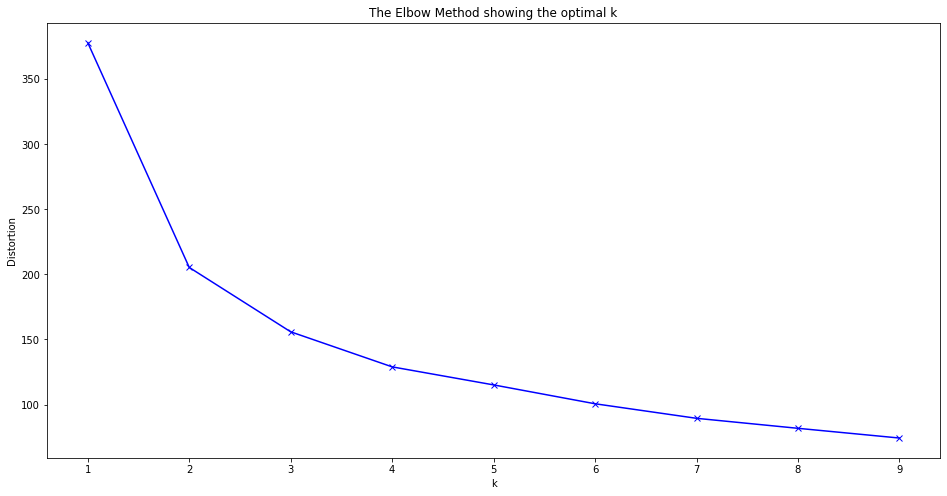

In [109]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


The elbow supposed to be at k=3 but I think it's to few, so I decided to use k=4

In [357]:
k=4
kmeanModel = KMeans(n_clusters=k, random_state=17081945)
kmeanModel.fit(cluster_dataset)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=17081945, tol=0.0001, verbose=0)

In [358]:
jakarta_data['Cluster Label'] = kmeanModel.labels_

In [359]:
jakarta_data

,Kecamatan,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service,Cluster Label
0,Cempaka Putih,-6.181214,106.868548,11,32,95,27,33,5,59,35,43,0
1,Gambir,-6.176684,106.830653,58,35,181,60,96,7,113,45,68,1
2,Johar Baru,-6.183125,106.855332,24,38,88,30,36,3,34,46,53,2
3,Kemayoran,-6.162546,106.856890,13,28,49,32,30,4,27,35,31,0
4,Menteng,-6.195026,106.832224,64,42,239,72,101,7,67,58,121,1
5,Sawah Besar,-6.155891,106.833580,23,27,172,26,57,7,61,41,51,2
6,Senen,-6.184971,106.843235,45,46,161,37,66,6,68,76,63,1
7,Tanah Abang,-6.205258,106.809500,43,44,178,69,98,6,53,58,102,1
8,Cilincing,-6.129015,106.944454,0,4,4,2,20,2,0,0,5,3
9,Kelapa Gading,-6.159938,106.902483,51,44,221,53,34,8,21,60,103,2


In [360]:
jakarta_data['Cluster Label'].value_counts()

2    16
0    13
3     7
1     6
Name: Cluster Label, dtype: int64

Get Cluster profile and compare it with the average as index

In [236]:
jakarta_clusters = jakarta_data.groupby('Cluster Label').mean()

In [307]:
jakarta_overall = jakarta_data.mean().to_frame().T

In [308]:
jakarta_overall

,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service,Cluster Label
0,-6.207038,106.836402,21.5,32.02381,113.095238,36.214286,39.119048,4.595238,34.357143,36.619048,54.428571,1.404762


In [239]:
jakarta_clusters

,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
Cluster Label,,,,,,,,,,,
0,-6.209024,106.837968,12.000000,27.076923,70.923077,30.307692,21.307692,2.076923,27.769231,27.384615,37.076923
1,-6.204089,106.824345,50.833333,44.666667,191.833333,60.666667,90.666667,6.833333,67.333333,61.833333,89.166667
2,-6.202559,106.818334,26.312500,38.937500,158.187500,40.937500,40.687500,5.062500,35.125000,45.687500,72.125000
3,-6.216114,106.885124,3.000000,14.571429,20.857143,15.428571,24.428571,6.285714,16.571429,11.428571,16.428571


In [228]:
jakarta_clusters.reset_index(inplace=True)

In [229]:
jakarta_clusters

,Cluster Label,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,0,-6.209024,106.837968,12.000000,27.076923,70.923077,30.307692,21.307692,2.076923,27.769231,27.384615,37.076923
1,1,-6.204089,106.824345,50.833333,44.666667,191.833333,60.666667,90.666667,6.833333,67.333333,61.833333,89.166667
2,2,-6.202559,106.818334,26.312500,38.937500,158.187500,40.937500,40.687500,5.062500,35.125000,45.687500,72.125000
3,3,-6.216114,106.885124,3.000000,14.571429,20.857143,15.428571,24.428571,6.285714,16.571429,11.428571,16.428571


In [240]:
jakarta_clusters.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [241]:
jakarta_clusters

,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
Cluster Label,,,,,,,,,
0,12.000000,27.076923,70.923077,30.307692,21.307692,2.076923,27.769231,27.384615,37.076923
1,50.833333,44.666667,191.833333,60.666667,90.666667,6.833333,67.333333,61.833333,89.166667
2,26.312500,38.937500,158.187500,40.937500,40.687500,5.062500,35.125000,45.687500,72.125000
3,3.000000,14.571429,20.857143,15.428571,24.428571,6.285714,16.571429,11.428571,16.428571


In [232]:
jakarta_clusters['Cluster Label'] = jakarta_clusters['Cluster Label'].apply(lambda x: 'Cluster '+str(x))

In [233]:
jakarta_clusters

,Cluster Label,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,Cluster 0,12.000000,27.076923,70.923077,30.307692,21.307692,2.076923,27.769231,27.384615,37.076923
1,Cluster 1,50.833333,44.666667,191.833333,60.666667,90.666667,6.833333,67.333333,61.833333,89.166667
2,Cluster 2,26.312500,38.937500,158.187500,40.937500,40.687500,5.062500,35.125000,45.687500,72.125000
3,Cluster 3,3.000000,14.571429,20.857143,15.428571,24.428571,6.285714,16.571429,11.428571,16.428571


In [242]:
jakarta_overall = jakarta_overall.iloc[:,2:11]

In [243]:
jakarta_overall

,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,21.5,32.02381,113.095238,36.214286,39.119048,4.595238,34.357143,36.619048,54.428571


In [190]:
jakarta_overall['Cluster Label'] = 'Overall'

In [244]:
jakarta_overall

,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,21.5,32.02381,113.095238,36.214286,39.119048,4.595238,34.357143,36.619048,54.428571


In [263]:
index_df = jakarta_overall/jakarta_overall.loc[0]

In [264]:
index_df['Cluster Label'] = 4

index_df.set_index('Cluster Label', inplace=True)
index_df.reset_index(inplace=True)
index_df

,Cluster Label,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [265]:
jakarta_clusters_index = jakarta_clusters/ jakarta_overall.loc[0]

jakarta_clusters_index.reset_index(inplace=True)

jakarta_clusters_index

,Cluster Label,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,0,0.558140,0.845525,0.627109,0.836899,0.544688,0.451973,0.808252,0.747824,0.681203
1,1,2.364341,1.394796,1.696211,1.675214,2.317712,1.487047,1.959806,1.688557,1.638233
2,2,1.223837,1.215892,1.398711,1.130424,1.040094,1.101684,1.022349,1.247643,1.325131
3,3,0.139535,0.455019,0.184421,0.426036,0.624467,1.367876,0.482328,0.312094,0.301837


In [267]:
jakarta_clusters_index=jakarta_clusters_index.append(index_df, ignore_index=True)

In [268]:
jakarta_clusters_index

,Cluster Label,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,0,0.558140,0.845525,0.627109,0.836899,0.544688,0.451973,0.808252,0.747824,0.681203
1,1,2.364341,1.394796,1.696211,1.675214,2.317712,1.487047,1.959806,1.688557,1.638233
2,2,1.223837,1.215892,1.398711,1.130424,1.040094,1.101684,1.022349,1.247643,1.325131
3,3,0.139535,0.455019,0.184421,0.426036,0.624467,1.367876,0.482328,0.312094,0.301837
4,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Plot the Clusters

In [269]:
from math import pi
 
# number of variable
categories=list(jakarta_clusters_index)[1:]
N = len(categories)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

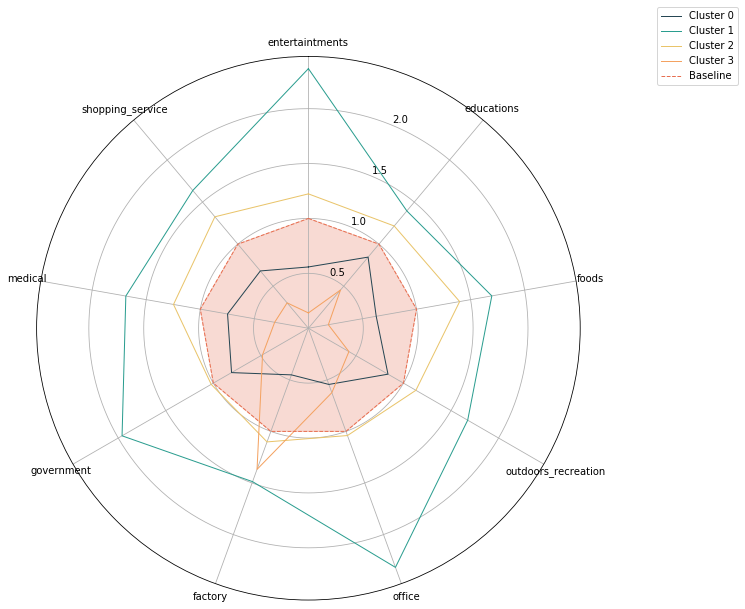

In [286]:
# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ["#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51"]


#['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']

# Initialise the spider plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
#ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Ensure radar goes from 0 to 100.
#ax.set_ylim(0, 200)

# Ind1
values=jakarta_clusters_index.loc[0].drop('Cluster Label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 0", color=rainbow[0])


# Ind2
values=jakarta_clusters_index.loc[1].drop('Cluster Label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 1", color=rainbow[1])

# Ind3
values=jakarta_clusters_index.loc[2].drop('Cluster Label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 2", color=rainbow[2])

# Ind4
values=jakarta_clusters_index.loc[3].drop('Cluster Label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 3", color=rainbow[3])

# Ind5
values=jakarta_clusters_index.loc[4].drop('Cluster Label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='dashed', label="Baseline", color=rainbow[4])
ax.fill(angles, values, color=rainbow[4], alpha=0.25)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

<p>The clusters is quite distinctive with Cluster 1 is over indexing for all categories. Cluster 0 is under indexing for all categories. Cluster 3 is under indexing for all categories except number of factories. Cluster 2 is about average.</p>

In [274]:
jakarta_data[jakarta_data['Cluster Label']==0]

,Kecamatan,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service,Cluster Label
0,Cempaka Putih,-6.181214,106.868548,11,32,95,27,33,5,59,35,43,0
3,Kemayoran,-6.162546,106.856890,13,28,49,32,30,4,27,35,31,0
11,Pademangan,-6.129052,106.828972,28,23,111,55,33,3,29,21,44,0
13,Tanjung Priok,-6.128858,106.870793,12,28,96,30,22,3,19,27,32,0
17,Duren Sawit,-6.234138,106.919247,9,37,63,34,13,3,18,34,44,0
18,Jatinegara,-6.214976,106.870340,14,24,58,28,30,0,56,33,49,0
19,Kramat Jati,-6.275477,106.870376,8,18,41,32,18,1,20,34,20,0
21,Matraman,-6.203624,106.864579,16,22,80,31,29,1,55,32,49,0
22,Pasar Rebo,-6.324973,106.853376,6,23,36,20,9,1,19,8,22,0
25,Jagakarsa,-6.330008,106.828191,9,36,44,18,15,1,11,19,32,0


Cluster 0 mostly on the outer part of Jakarta eastern and shoutern part of the city.

In [275]:
jakarta_data[jakarta_data['Cluster Label']==1]

,Kecamatan,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service,Cluster Label
1,Gambir,-6.176684,106.830653,58,35,181,60,96,7,113,45,68,1
4,Menteng,-6.195026,106.832224,64,42,239,72,101,7,67,58,121,1
6,Senen,-6.184971,106.843235,45,46,161,37,66,6,68,76,63,1
7,Tanah Abang,-6.205258,106.809500,43,44,178,69,98,6,53,58,102,1
26,Kebayoran Baru,-6.244146,106.800434,36,57,172,59,52,9,62,77,82,1
32,Setiabudi,-6.218449,106.830025,59,44,220,67,131,6,41,57,99,1


Cluster 1 are mainly commercial area in the center of the city where offices and government buildings. This cluster are most active cluster.

In [361]:
jakarta_data[jakarta_data['Cluster Label']==2]

,Kecamatan,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service,Cluster Label
2,Johar Baru,-6.183125,106.855332,24,38,88,30,36,3,34,46,53,2
5,Sawah Besar,-6.155891,106.833580,23,27,172,26,57,7,61,41,51,2
9,Kelapa Gading,-6.159938,106.902483,51,44,221,53,34,8,21,60,103,2
12,Penjaringan,-6.117265,106.767433,15,37,148,69,21,3,5,39,73,2
23,Pulo Gadung,-6.191109,106.890605,22,33,121,45,28,4,34,44,61,2
24,Cilandak,-6.286898,106.794421,25,44,175,51,52,4,22,67,60,2
27,Kebayoran Lama,-6.243886,106.779859,24,40,154,35,36,11,43,54,85,2
28,Mampang Prapatan,-6.249374,106.821860,43,47,161,42,63,4,55,52,66,2
29,Pancoran,-6.253298,106.844977,26,42,107,44,37,3,57,34,58,2
30,Pasar Minggu,-6.285642,106.829735,25,34,123,31,46,7,46,33,63,2


Cluster 2 are average area in the second ring mainly old settlement in west and north Jakarta

In [277]:
jakarta_data[jakarta_data['Cluster Label']==3]

,Kecamatan,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service,Cluster Label
8,Cilincing,-6.129015,106.944454,0,4,4,2,20,2,0,0,5,3
10,Koja,-6.120750,106.907362,4,9,32,11,31,4,42,29,22,3
14,Cakung,-6.185562,106.940109,3,17,22,9,40,11,5,4,21,3
15,Cipayung,-6.329399,106.903739,4,16,14,7,8,2,17,3,12,3
16,Ciracas,-6.329635,106.876604,3,19,17,16,26,14,23,10,14,3
20,Makasar,-6.269341,106.888817,2,14,22,36,30,5,17,15,10,3
34,Cengkareng,-6.149093,106.734781,5,23,35,27,16,6,12,19,31,3


Cluster 3 is where factories are

### Plot Clusters on Map

In [363]:
address = 'jakarta'

geolocator = Nominatim(user_agent="asa_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))

The geograpical coordinate are -6.1753942, 106.827183.


In [364]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jakarta_data['Latitude'], jakarta_data['Longitude'], jakarta_data['Kecamatan'], jakarta_data['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


### Segmenting Seoul Neighborhood

Clustering Seoul neighborhood with same methods

In [289]:
seoul_data['entertaintments'] = 0
seoul_data['educations'] = 0
seoul_data['foods'] = 0
seoul_data['outdoors_recreation'] = 0
seoul_data['office'] = 0
seoul_data['factory'] = 0
seoul_data['government'] = 0
seoul_data['medical'] = 0
seoul_data['shopping_service'] = 0

In [290]:
radius = 3000 # define radius, use bigger radius since number of neighborhood is fewer
for index, row in seoul_data.iterrows():
    print(index)
    seoul_data.at[index, 'entertaintments'] = getNearbyVenues(row['Latitude'], row['Longitude'], entertaintments, radius)
    seoul_data.at[index, 'educations'] = getNearbyVenues(row['Latitude'], row['Longitude'], educations, radius)
    seoul_data.at[index, 'foods'] = getNearbyVenues(row['Latitude'], row['Longitude'], foods, radius)
    seoul_data.at[index, 'outdoors_recreation'] = getNearbyVenues(row['Latitude'], row['Longitude'], outdoors_recreation, radius)
    seoul_data.at[index, 'office'] = getNearbyVenues(row['Latitude'], row['Longitude'], office, radius)
    seoul_data.at[index, 'factory'] = getNearbyVenues(row['Latitude'], row['Longitude'], factory, radius)
    seoul_data.at[index, 'government'] = getNearbyVenues(row['Latitude'], row['Longitude'], government, radius)
    seoul_data.at[index, 'medical'] = getNearbyVenues(row['Latitude'], row['Longitude'], medical, radius)
    seoul_data.at[index, 'shopping_service'] = getNearbyVenues(row['Latitude'], row['Longitude'], shopping_service, radius)

seoul_data

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


,Name,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,Dobong-gu (도봉구; 道峰區),37.668600,127.046600,7,37,60,33,10,0,22,13,23
1,Dongdaemun-gu (동대문구; 東大門區),37.574200,127.039500,28,129,154,57,17,2,54,39,101
2,Dongjak-gu (동작구; 銅雀區),37.512100,126.939500,17,66,191,70,77,7,51,43,104
3,Eunpyeong-gu (은평구; 恩平區),37.602400,126.929300,7,54,72,23,7,0,30,18,36
4,Gangbuk-gu (강북구; 江北區),37.639500,127.025500,6,43,53,34,19,0,16,13,28
5,Gangdong-gu (강동구; 江東區),37.530000,127.123700,28,48,198,73,21,0,30,42,98
6,Gangnam-gu (강남구; 江南區),37.517700,127.047300,75,69,227,135,116,13,53,125,178
7,Gangseo-gu (강서구; 江西區),37.550900,126.849700,7,34,93,41,18,5,23,29,37
8,Geumcheon-gu (금천구; 衿川區),37.456500,126.895400,3,17,73,18,30,8,15,10,37
9,Guro-gu (구로구; 九老區),37.495200,126.887700,22,50,172,48,54,8,44,32,82


In [291]:
seoul_data.describe()

,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,37.553644,126.989213,40.040000,65.280000,147.640000,69.360000,41.120000,5.160000,41.360000,40.440000,84.680000
std,0.054257,0.079451,46.518348,28.954735,59.406004,37.273628,37.419157,5.038849,25.066379,26.953788,44.198152
min,37.456500,126.849700,3.000000,17.000000,41.000000,18.000000,3.000000,0.000000,10.000000,10.000000,21.000000
25%,37.517100,126.929300,12.000000,43.000000,93.000000,41.000000,18.000000,1.000000,23.000000,29.000000,37.000000
50%,37.550900,126.997510,25.000000,54.000000,158.000000,67.000000,23.000000,4.000000,36.000000,36.000000,97.000000
75%,37.580695,127.046600,47.000000,84.000000,191.000000,76.000000,54.000000,8.000000,53.000000,43.000000,104.000000
max,37.668600,127.123700,174.000000,129.000000,243.000000,145.000000,120.000000,15.000000,106.000000,125.000000,178.000000


In [292]:
from sklearn.preprocessing import StandardScaler

X = seoul_data.values[:,3:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-7.24903409e-01, -9.96837110e-01, -1.50569293e+00,
        -9.95603909e-01, -8.48808987e-01, -1.04515989e+00,
        -7.88275707e-01, -1.03903144e+00, -1.42431036e+00],
       [-2.64159717e-01,  2.24605589e+00,  1.09267538e-01,
        -3.38439613e-01, -6.57881515e-01, -6.40059158e-01,
         5.14659346e-01, -5.45264312e-02,  3.76860330e-01],
       [-5.05501651e-01,  2.53791626e-02,  7.44943466e-01,
         1.75243812e-02,  9.78639667e-01,  3.72692674e-01,
         3.92509184e-01,  9.69358777e-02,  4.46136126e-01],
       [-7.24903409e-01, -3.97606881e-01, -1.29952776e+00,
        -1.26942237e+00, -9.30635046e-01, -1.04515989e+00,
        -4.62541944e-01, -8.49703553e-01, -1.12411525e+00],
       [-7.46843585e-01, -7.85344088e-01, -1.62595594e+00,
        -9.68222064e-01, -6.03330809e-01, -1.04515989e+00,
        -1.03257603e+00, -1.03903144e+00, -1.30885070e+00],
       [-2.64159717e-01, -6.09099903e-01,  8.65206480e-01,
         9.96699183e-02, -5.48780103e-01, -1.045159

In [293]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=17081945)
    kmeanModel.fit(cluster_dataset)
    distortions.append(kmeanModel.inertia_)

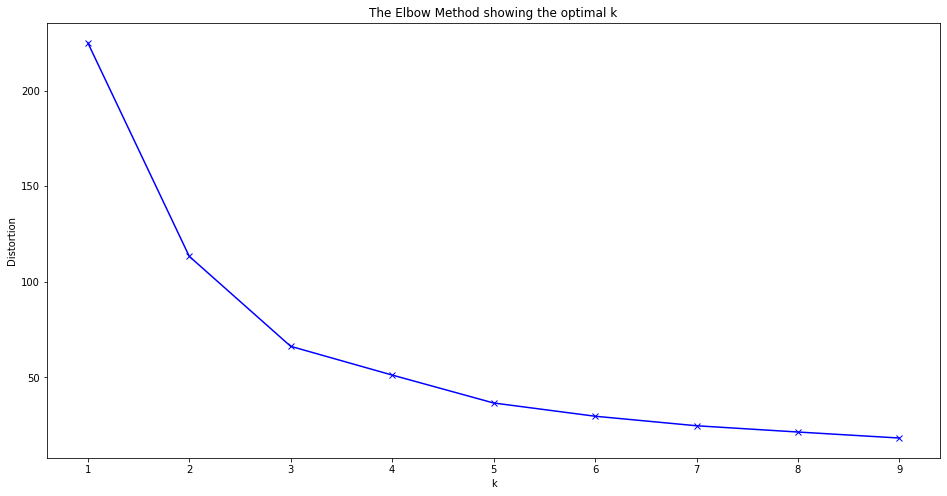

In [294]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow plot for Seoul is almost the same as Jakarta, we use k=4

In [295]:
k=4
kmeanModel = KMeans(n_clusters=k, random_state=17081945)
kmeanModel.fit(cluster_dataset)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=17081945, tol=0.0001, verbose=0)

In [296]:
seoul_data['Cluster Label'] = kmeanModel.labels_
seoul_data

,Name,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service,Cluster Label
0,Dobong-gu (도봉구; 道峰區),37.668600,127.046600,7,37,60,33,10,0,22,13,23,2
1,Dongdaemun-gu (동대문구; 東大門區),37.574200,127.039500,28,129,154,57,17,2,54,39,101,0
2,Dongjak-gu (동작구; 銅雀區),37.512100,126.939500,17,66,191,70,77,7,51,43,104,1
3,Eunpyeong-gu (은평구; 恩平區),37.602400,126.929300,7,54,72,23,7,0,30,18,36,2
4,Gangbuk-gu (강북구; 江北區),37.639500,127.025500,6,43,53,34,19,0,16,13,28,2
5,Gangdong-gu (강동구; 江東區),37.530000,127.123700,28,48,198,73,21,0,30,42,98,1
6,Gangnam-gu (강남구; 江南區),37.517700,127.047300,75,69,227,135,116,13,53,125,178,3
7,Gangseo-gu (강서구; 江西區),37.550900,126.849700,7,34,93,41,18,5,23,29,37,2
8,Geumcheon-gu (금천구; 衿川區),37.456500,126.895400,3,17,73,18,30,8,15,10,37,2
9,Guro-gu (구로구; 九老區),37.495200,126.887700,22,50,172,48,54,8,44,32,82,1


In [297]:
seoul_data['Cluster Label'].value_counts()

1    10
2     7
3     4
0     4
Name: Cluster Label, dtype: int64

In [317]:
seoul_clusters = seoul_data.groupby('Cluster Label').mean()

seoul_clusters

,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
Cluster Label,,,,,,,,,,,
0,37.555369,126.986147,45.250000,114.750000,162.750000,54.750000,19.50,2.5,38.250000,44.250000,96.000000
1,37.529587,126.982973,30.500000,56.900000,172.800000,74.600000,39.30,5.1,40.900000,37.500000,89.600000
2,37.596886,126.985171,6.428571,37.857143,66.571429,32.142857,14.00,2.0,20.142857,15.714286,30.571429
3,37.536388,127.014952,117.500000,84.750000,211.500000,136.000000,114.75,13.5,82.750000,87.250000,155.750000


In [318]:
seoul_clusters.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
seoul_clusters

,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
Cluster Label,,,,,,,,,
0,45.250000,114.750000,162.750000,54.750000,19.50,2.5,38.250000,44.250000,96.000000
1,30.500000,56.900000,172.800000,74.600000,39.30,5.1,40.900000,37.500000,89.600000
2,6.428571,37.857143,66.571429,32.142857,14.00,2.0,20.142857,15.714286,30.571429
3,117.500000,84.750000,211.500000,136.000000,114.75,13.5,82.750000,87.250000,155.750000


In [315]:
seoul_overall = seoul_data.mean().to_frame().T
seoul_overall.drop(['Latitude', 'Longitude','Cluster Label'], axis=1, inplace=True)

seoul_overall

,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,40.04,65.28,147.64,69.36,41.12,5.16,41.36,40.44,84.68


In [319]:
seoul_clusters_index = seoul_clusters/ seoul_overall.loc[0]

seoul_clusters_index.reset_index(inplace=True)
seoul_clusters_index.set_index('Cluster Label', inplace=True)
seoul_clusters_index.reset_index(inplace=True)

seoul_clusters_index

,Cluster Label,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,0,1.130120,1.757812,1.102344,0.789360,0.474222,0.484496,0.924807,1.094214,1.133680
1,1,0.761738,0.871630,1.170415,1.075548,0.955739,0.988372,0.988878,0.927300,1.058101
2,2,0.160554,0.579919,0.450904,0.463421,0.340467,0.387597,0.487013,0.388583,0.361023
3,3,2.934565,1.298254,1.432539,1.960784,2.790613,2.616279,2.000725,2.157517,1.839277


In [320]:
seoul_clusters_index=seoul_clusters_index.append(index_df, ignore_index=True)
seoul_clusters_index

,Cluster Label,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service
0,0,1.130120,1.757812,1.102344,0.789360,0.474222,0.484496,0.924807,1.094214,1.133680
1,1,0.761738,0.871630,1.170415,1.075548,0.955739,0.988372,0.988878,0.927300,1.058101
2,2,0.160554,0.579919,0.450904,0.463421,0.340467,0.387597,0.487013,0.388583,0.361023
3,3,2.934565,1.298254,1.432539,1.960784,2.790613,2.616279,2.000725,2.157517,1.839277
4,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


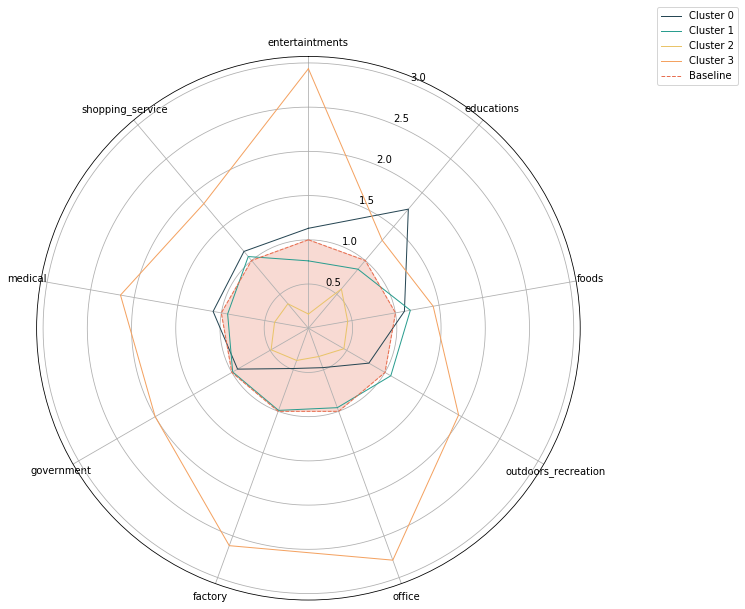

In [321]:
# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ["#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51"]


#['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']

# Initialise the spider plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
#ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Ensure radar goes from 0 to 100.
#ax.set_ylim(0, 200)

# Ind1
values=seoul_clusters_index.loc[0].drop('Cluster Label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 0", color=rainbow[0])


# Ind2
values=seoul_clusters_index.loc[1].drop('Cluster Label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 1", color=rainbow[1])

# Ind3
values=seoul_clusters_index.loc[2].drop('Cluster Label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 2", color=rainbow[2])

# Ind4
values=seoul_clusters_index.loc[3].drop('Cluster Label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 3", color=rainbow[3])

# Ind5
values=seoul_clusters_index.loc[4].drop('Cluster Label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='dashed', label="Baseline", color=rainbow[4])
ax.fill(angles, values, color=rainbow[4], alpha=0.25)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

Seoul neighborhood clusters are slightly different with Jakarta. The similarity was 1 cluster over index, 1 cluster under index, 1 cluster average. The different was no cluster that has more factories but more educations instead.

In [322]:
seoul_data[seoul_data['Cluster Label']==0]

,Name,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service,Cluster Label
1,Dongdaemun-gu (동대문구; 東大門區),37.574200,127.039500,28,129,154,57,17,2,54,39,101,0
10,Gwanak-gu (관악구; 冠岳區),37.478200,126.951800,19,106,184,42,22,2,22,33,63,0
18,Seodaemun-gu (서대문구; 西大門區),37.579075,126.936786,40,116,153,53,16,4,25,63,105,0
19,Seongbuk-gu (성북구; 城北區),37.590000,127.016500,94,108,160,67,23,2,52,42,115,0


Cluster 0 is second ring from city center, has more education venues

In [323]:
seoul_data[seoul_data['Cluster Label']==1]

,Name,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service,Cluster Label
2,Dongjak-gu (동작구; 銅雀區),37.512100,126.939500,17,66,191,70,77,7,51,43,104,1
5,Gangdong-gu (강동구; 江東區),37.530000,127.123700,28,48,198,73,21,0,30,42,98,1
9,Guro-gu (구로구; 九老區),37.495200,126.887700,22,50,172,48,54,8,44,32,82,1
11,Gwangjin-gu (광진구; 廣津區),37.538400,127.082800,18,69,107,68,23,5,21,40,57,1
15,Mapo-gu (마포구; 麻浦區),37.566571,126.901532,54,43,221,68,34,15,23,33,103,1
20,Seongdong-gu (성동구; 城東區),37.563500,127.036500,30,83,161,74,29,5,49,36,102,1
21,Songpa-gu (송파구; 松坡區),37.514500,127.105800,30,51,212,85,19,1,39,40,97,1
22,Yangcheon-gu (양천구; 陽川區),37.517100,126.866300,16,47,158,58,26,2,36,30,67,1
23,Yeongdeungpo-gu (영등포구; 永登浦區),37.526200,126.895900,25,54,154,76,74,5,60,47,103,1
24,Yongsan-gu (용산구; 龍山區),37.532300,126.990000,65,58,154,126,36,3,56,32,83,1


Cluster 1 is the average area

In [324]:
seoul_data[seoul_data['Cluster Label']==2]

,Name,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service,Cluster Label
0,Dobong-gu (도봉구; 道峰區),37.6686,127.0466,7,37,60,33,10,0,22,13,23,2
3,Eunpyeong-gu (은평구; 恩平區),37.6024,126.9293,7,54,72,23,7,0,30,18,36,2
4,Gangbuk-gu (강북구; 江北區),37.6395,127.0255,6,43,53,34,19,0,16,13,28,2
7,Gangseo-gu (강서구; 江西區),37.5509,126.8497,7,34,93,41,18,5,23,29,37,2
8,Geumcheon-gu (금천구; 衿川區),37.4565,126.8954,3,17,73,18,30,8,15,10,37,2
14,Jungnang-gu (중랑구; 中浪區),37.6063,127.0930,3,37,41,36,3,1,10,11,21,2
16,Nowon-gu (노원구; 蘆原區),37.6540,127.0567,12,43,74,40,11,0,25,16,32,2


Cluster 3 is the over index area

In [325]:
seoul_data[seoul_data['Cluster Label']==3]

,Name,Latitude,Longitude,entertaintments,educations,foods,outdoors_recreation,office,factory,government,medical,shopping_service,Cluster Label
6,Gangnam-gu (강남구; 江南區),37.517700,127.047300,75,69,227,135,116,13,53,125,178,3
12,Jongno-gu (종로구; 鍾路區),37.580695,126.982799,174,93,243,136,119,14,106,61,150,3
13,Jung-gu (중구; 中區),37.563656,126.997510,174,93,199,145,120,14,106,59,162,3
17,Seocho-gu (서초구; 瑞草區),37.483500,127.032200,47,84,177,128,104,13,66,104,133,3


Cluster 3 is the most active area, has more entertaintments and located in the city center

In [326]:
address = 'seoul'

geolocator = Nominatim(user_agent="asa_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))

The geograpical coordinate are 37.5666791, 126.9782914.


In [332]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seoul_data['Latitude'], seoul_data['Longitude'], seoul_data['Name'], seoul_data['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


### Insight
<p>From above segment compariso we can conclude that Jakarta and Seoul has many similarities. There are same number of clusters with almost the same characteristics. City centers are the most active one, has more venues that other area. There are also neighbor with less venue, usually in the outer parts of the city. Altough many similarities there are dissimilaties, which is Jakarta has factories area which located outside of the city and generally has less venue. While Seoul has cluster that has more education venues. Although is we examine closer those education cluster actually also industrial area according to Wikipedia. This might indicate that industrial area of Seoul is more well managed and provide more education facility to the workers.</p>
<p>We can also see that Seoul in general has more venue than Jakarta. It might the result of more foursquare active users is Seoul or in reality indeed Seoul is more advance than Jakarta. Jakarta can learn from Seoul about city management and improving public facilites.</p>